In [3]:
import Pkg
Pkg.add("DiffEqBayes")
Pkg.add("Distributions")
Pkg.add("OrdinaryDiffEq")
Pkg.add("RecursiveArrayTools")
Pkg.add("ParameterizedFunctions")
Pkg.add("Plots")

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
  Installed ParameterizedFunctions ─ v5.3.0
   Updating `~/.julia/environments/v1.4/Project.toml`
  [65888b18] + ParameterizedFunctions v5.3.0
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [65888b18] + ParameterizedFunctions v5.3.0
  Resolving package versions...
  Installed libvo

In [12]:
using DiffEqBayes
using Distributions
using OrdinaryDiffEq, RecursiveArrayTools, ParameterizedFunctions
using Plots

┌ Info: Precompiling OrdinaryDiffEq [1dea7af3-3e70-54e6-95c3-0bf5283fa5ed]
└ @ Base loading.jl:1260
┌ Info: Precompiling ParameterizedFunctions [65888b18-ceab-5e60-b2b9-181511a3b968]
└ @ Base loading.jl:1260
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [13]:
gr(fmt=:png)
Plots.GRBackend()

Plots.GRBackend()

In [14]:
f = @ode_def LotkaVolterraTest begin
    dx = a*x - b*x*y
    dy = -c*y + d*x*y
end a b c d

(::LotkaVolterraTest{var"###ParameterizedDiffEqFunction#273",var"###ParameterizedTGradFunction#274",var"###ParameterizedJacobianFunction#275",Nothing,Nothing,ModelingToolkit.ODESystem}) (generic function with 1 method)

In [15]:
u0 = [1.0,1.0]
tspan = (0.0,10.0)
p = [1.5,1.0,3.0,1,0]

5-element Array{Float64,1}:
 1.5
 1.0
 3.0
 1.0
 0.0

In [16]:
prob = ODEProblem(f,u0,tspan,p)
sol = solve(prob,Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 34-element Array{Float64,1}:
  0.0
  0.0776084743154256
  0.23264513699277584
  0.4291185174543143
  0.6790821776882875
  0.9444045910389707
  1.2674601253261835
  1.6192913723304114
  1.9869755337814992
  2.264090367186479
  2.5125486490278424
  2.746828248824617
  3.038006827022277
  ⋮
  6.455761908474447
  6.780495751224447
  7.171039674548505
  7.584862904164952
  7.978068388305894
  8.483164907244102
  8.719247868929038
  8.949206527971544
  9.200184813643565
  9.438028630962807
  9.711807852444823
 10.0
u: 34-element Array{Array{Float64,1},1}:
 [1.0, 1.0]
 [1.0454942346944578, 0.8576684823217127]
 [1.1758715885138267, 0.639459570317544]
 [1.4196809607170826, 0.4569962601282084]
 [1.8767193485546056, 0.32473343696185236]
 [2.5882499852859384, 0.26336255804531]
 [3.860708771268753, 0.2794458027885767]
 [5.750812903389158, 0.5220073140479389]
 [6.814978737433837, 1.917783300239219]
 [4.3929977807914105, 4.

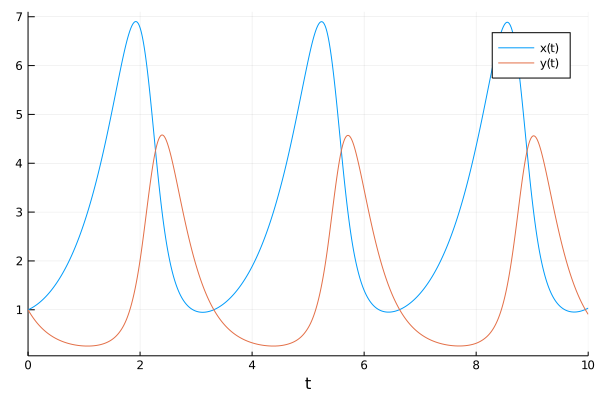

In [17]:
plot(sol)

In [18]:
t = collect(range(1,stop=10,length=10))
sig = 0.49
data = convert(Array, VectorOfArray([(sol(t[i]) + sig*randn(2)) for i in 1:length(t)]))

2×10 Array{Float64,2}:
 3.10929   6.71886  1.21611   2.00706   …  4.89996   3.20198  1.25936
 0.891801  1.97942  1.79062  -0.833255     0.716456  4.28652  1.50355

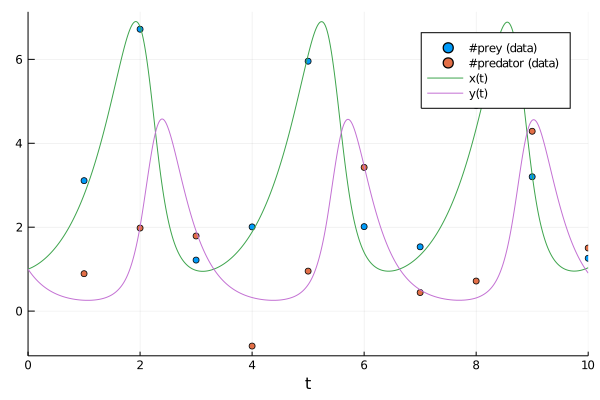

In [19]:
scatter(t, data[1,:], lab="#prey (data)")
scatter!(t, data[2,:], lab="#predator (data)")
plot!(sol)

In [20]:
priors = [Truncated(Normal(1.5,0.5),0.5,2.5),Truncated(Normal(1.2,0.5),0,2),Truncated(Normal(3.0,0.5),1,4),Truncated(Normal(1.0,0.5),0,2)]

4-element Array{Truncated{Normal{Float64},Continuous,Float64},1}:
 Truncated(Normal{Float64}(μ=1.5, σ=0.5), range=(0.5, 2.5))
 Truncated(Normal{Float64}(μ=1.2, σ=0.5), range=(0.0, 2.0))
 Truncated(Normal{Float64}(μ=3.0, σ=0.5), range=(1.0, 4.0))
 Truncated(Normal{Float64}(μ=1.0, σ=0.5), range=(0.0, 2.0))

In [21]:
bayesian_result_turing = turing_inference(prob,Tsit5(),t,data,priors,num_samples=10_000)

┌ Info: Found initial step size
│   ϵ = 0.4
└ @ Turing.Inference /Users/hstrey/.julia/packages/Turing/d4vqQ/src/inference/hmc.jl:626
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/hstrey/.julia/packages/AdvancedHMC/WJCQA/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/hstrey/.julia/packages/AdvancedHMC/WJCQA/src/hamiltonian.jl:47


Object of type Chains, with data of type 9000×17×1 Array{Float64,3}

Iterations        = 1:9000
Thinning interval = 1
Chains            = 1
Samples per chain = 9000
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth
parameters        = theta[1], theta[2], theta[3], theta[4], σ[1]

2-element Array{MCMCChains.ChainDataFrame,1}

Summary Statistics
  parameters    mean     std  naive_se    mcse        ess   r_hat
  ──────────  ──────  ──────  ────────  ──────  ─────────  ──────
    theta[1]  1.5477  0.0990    0.0010  0.0025  1764.6465  1.0000
    theta[2]  1.0802  0.1096    0.0012  0.0022  2045.8886  1.0005
    theta[3]  2.9150  0.2668    0.0028  0.0070  1738.5681  1.0000
    theta[4]  0.9700  0.0980    0.0010  0.0025  1791.3064  1.0001
        σ[1]  0.5428  0.1054    0.0011  0.0020  2554.1288  0.9999

Quantiles
  parameters    2.5%   25.0